In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import pickle


In [2]:
df = pd.read_csv('eda.csv')

In [3]:
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,job_state,same_state,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len
0,0,People Analytics Data Scientist,Employer Provided Salary:$51K - $124K,"At PayPal (NASDAQ: PYPL), we believe that ever...",3.9,PayPal\n3.9,"San Jose, CA","San Jose, CA",10000+ Employees,1998,...,CA,1,0,0,0,0,0,data scientist,na,1649
1,1,Data Scientist,Employer Provided Salary:$128K,"Aetna Resources LLC, a CVS Health company, is ...",3.1,CVS Health\n3.1,"New York, NY","New York, NY",10000+ Employees,1963,...,NY,1,1,0,0,1,0,data scientist,na,3923
2,2,Junior Data Scientist/ Data Analytics - Full T...,$73K - $111K (Glassdoor est.),"Job Type:\nFull Time\nLocaton:\nLittle Elm, TX...",5.0,RSA Tech\n5.0,"Little Elm, TX","Little Elm, TX",51 to 200 Employees,Company - Public,...,TX,1,0,0,0,0,0,data scientist,na,117
3,3,Data Scientist,$73K - $111K (Glassdoor est.),THIS IS BLUE APRON\n\nChefs around the world w...,3.6,Blue Apron\n3.6,"New York, NY","New York, NY",1001 to 5000 Employees,2012,...,NY,1,0,0,0,1,1,data scientist,na,3111
4,4,Data Scientist,$73K - $111K (Glassdoor est.),About Pinterest:\nMillions of people across th...,4.0,Pinterest\n4.0,Remote,Remote,1001 to 5000 Employees,2010,...,Remote,1,0,0,0,0,0,data scientist,na,1492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Jr Data Scientist,$77K - $113K (Glassdoor est.),"PacArctic,LLC, a Koniag Government Services co...",4.0,PacArctic LLC\n4.0,"Washington, DC","Washington, DC",501 to 1000 Employees,Company - Public,...,DC,1,0,0,0,0,0,data scientist,jr,964
96,96,Applied Scientist - Ad Market Dynamic (Remote),Employer Provided Salary:$106K - $235K,Summary\nYelp engineering culture is driven by...,3.5,Yelp\n3.5,Remote,Remote,5001 to 10000 Employees,2004,...,Remote,1,0,0,0,0,0,na,na,945
97,97,Data Scientist,Employer Provided Salary:$70K - $105K,"Job Summary\nUnder minimal supervision, suppor...",3.6,Denver Health\n3.6,"Denver, CO","Denver, CO",5001 to 10000 Employees,1860,...,CO,1,0,0,0,0,0,data scientist,na,1252
98,98,"Data Scientist II, Associate",$78K - $109K (Glassdoor est.),AbbVie’s Operations Business Insights (OBI) gr...,3.9,ABBVIE\n3.9,"Crystal Lake, IL","Crystal Lake, IL",10000+ Employees,2013,...,IL,1,1,0,0,0,0,data scientist,na,697


In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'python_yn', 'R_yn', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [5]:
df_model = df[['Rating','Size','Type of ownership', 'Industry', 'Sector', 'Revenue','hourly', 'employer_provided', 'job_state', 'same_state', 'python_yn', 'R_yn', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len','avg_salary']]

In [6]:
df_dum = pd.get_dummies(df_model)

In [7]:
df_dum

,Rating,hourly,employer_provided,same_state,python_yn,R_yn,spark,aws,excel,desc_len,...,job_state_Remote,job_state_United States,job_state_Wisconsin,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,3.9,0,1,1,0,0,0,0,0,1649,...,0,0,0,0,0,1,0,0,1,0
1,3.1,0,1,1,1,0,0,1,0,3923,...,0,0,0,0,0,1,0,0,1,0
2,5.0,0,0,1,0,0,0,0,0,117,...,0,0,0,0,0,1,0,0,1,0
3,3.6,0,0,1,0,0,0,1,1,3111,...,0,0,0,0,0,1,0,0,1,0
4,4.0,0,0,1,0,0,0,0,0,1492,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.0,0,0,1,0,0,0,0,0,964,...,0,0,0,0,0,1,0,1,0,0
96,3.5,0,1,1,0,0,0,0,0,945,...,1,0,0,0,0,0,1,0,1,0
97,3.6,0,1,1,0,0,0,0,0,1252,...,0,0,0,0,0,1,0,0,1,0
98,3.9,0,0,1,1,0,0,0,0,697,...,0,0,0,0,0,1,0,0,1,0


In [8]:
X= df_dum.drop('avg_salary', axis=1)
y =df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# multiple linear regression
X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     99.18
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           3.16e-21
Time:                        08:54:09   Log-Likelihood:                -192.68
No. Observations:                 100   AIC:                             533.4
Df Residuals:                      26   BIC:                             726.1
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                        73.4372      2.885     25.453      0.000      67.507      79.368
Rating                                                      -16.1874      1.823     -8.877      0.000     -19.936     -12.439
hourly                                                      -36.7699      3.589    -10.245      0.000     -44.147     -29.392
employer_provided                                            11.0000      4.609      2.387      0.025       1.527      20.473
same_state                                                   60.2578      2.795     21.561      0.000      54.513      66.002
python_yn                                                     9.7733      1.965      4.974      0.000       5.735      13.812
R_yn                                                      -1.077e-11   2.98e-12     -3.618      0.001   -1.69e-11   -4.65e-12
spark                                                         8.6129      2.776      3.103      0.005       2.908      14.318
aws                                                          -1.8044      4.643     -0.389      0.701     -11.349       7.740
excel                                                        18.4461      1.787     10.322      0.000      14.773      22.119
desc_len                                                     -0.0041      0.001     -2.801      0.009      -0.007      -0.001
Size_-1                                                      13.1794      1.417      9.302      0.000      10.267      16.092
Size_1 to 50 Employees                                        5.6389      2.503      2.253      0.033       0.495      10.783
Size_10000+ Employees                                        -7.8421      2.274     -3.448      0.002     -12.517      -3.167
Size_1001 to 5000 Employees                                  17.6255      2.425      7.267      0.000      12.640      22.611
Size_201 to 500 Employees                                     6.8112      2.055      3.315      0.003       2.588      11.034
Size_5001 to 10000 Employees                                  6.1629      2.540      2.427      0.022       0.943      11.383
Size_501 to 1000 Employees                                   44.9642      3.356     13.397      0.000      38.065      51.863
Size_51 to 200 Employees                                      2.3307      2.235      1.043      0.307      -2.264       6.925
Size_Unknown                                                -15.4334      2.053     -7.516      0.000     -19.654     -11.212
Type of ownership_-1                                         13.1794      1.417      9.302      0.000      10.267      16.092
Type of ownership_Building & Personnel Services            

In [10]:
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [11]:
np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv = 3))

-16.69385097139499

In [12]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-18.154597802709183

c:\Users\fatem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.053e+02, tolerance: 3.378e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\fatem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.374e+02, tolerance: 4.454e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\fatem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.534e+02, toleranc

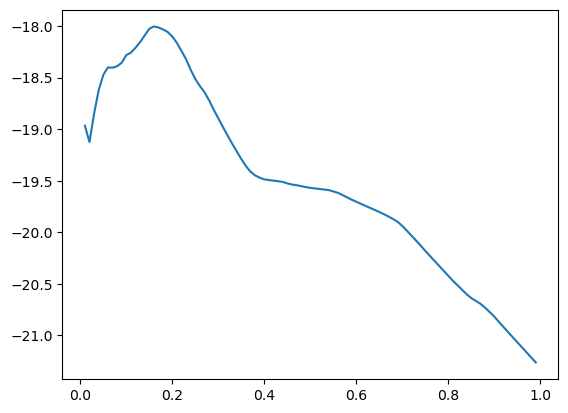

In [13]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)


In [14]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
15,0.16,-18.003339


In [15]:
# random forest 
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-18.84191571699905

In [16]:
# tune models GridsearchCV 

parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)


gs.best_estimator_

c:\Users\fatem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\fatem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\fatem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\fatem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\fatem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

RandomForestRegressor(criterion='mse', max_features='log2', n_estimators=260)

In [17]:
gs.best_score_

-16.861225512577008

In [18]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)


mean_absolute_error(y_test,tpred_lm)


20.4575044565818

In [19]:
mean_absolute_error(y_test,tpred_lml)


21.661223448263986

In [20]:
mean_absolute_error(y_test,tpred_rf)

17.189756944444447

In [21]:
tpred_lm+tpred_rf/2

array([176.33774615, 252.60673077, 159.54105056, 166.49549545,
       184.3031012 , 143.84018543, 150.26375166, 121.93669872,
       206.43259048, 247.84369359, 145.11683275, 217.25776302,
       148.53945513, 184.97788462, 144.70865385, 181.23101386,
       141.2125    , 141.2125    , 124.70951485, 144.70865385])

In [22]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

18.771899931282064

In [23]:
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])


c:\Users\fatem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[3.5,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 945.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0]